In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import json

import warnings
warnings.filterwarnings("ignore")

print('numpy version - ' , np.__version__)
print('pandas version - ' , pd.__version__)

def seriesinfo(s) :
    print('index - ' , s.index , type(s.index))
    print('value - ' , s.values , type(s.values))
    print()
    print('data - ')
    print(s)
    
def frminfo(df) :
    print('shape     - ' , df.shape)
    print('size      - ' , df.size)
    print('ndim      - ' , df.ndim )
    print('index     - ' , df.index   , type(df.index))
    print('col index - ' , df.columns , type(df.columns))
    print('values    - ')
    print(df.values  , '\n' , type(df.values))
    print()
    print('data - ')
    display(df)
    

numpy version -  1.21.5
pandas version -  1.4.4


In [124]:
car_frm = pd.read_excel('C:/Users/PiGiraffe0/Documents/SQL/data/test/mpg_visualization.xlsx' ,
                       usecols = 'B:L')
car_frm.info()
frminfo(car_frm)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB
shape     -  (234, 11)
size      -  2574
ndim      -  2
index     -  RangeIndex(start=0, stop=234, step=1) <class 'pandas.core.indexes.range.RangeIndex'>
col index -  Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [125]:
# 문제01]
# 자동차 배기량(displ)에 따라 고속도로 연비(hwy)가 다른지를 알아보자
# 배기량이 4 이하인 자동차화 5이상인 자동차 중 어떤 자동차의 고속도로연비가 평균적으로 
# 높은지 알아보자

In [126]:
# car_frm.groupby('displ').size()
# car_frm['displ'] == car_frm['displ'].unique()[0]
print('배기량 4 이하인 자동차의 고속도로 연비 : ' , round(car_frm[car_frm['displ'] <= 4]['hwy'].mean() , 2))
print('배기량 5 이상인 자동차의 고속도로 연비 : ' , round(car_frm[car_frm['displ'] >= 5]['hwy'].mean() , 2))
print('배기량 5 이상인 자동차의 고속도로 연비가 더 높다.')

배기량 4 이하인 자동차의 고속도로 연비 :  25.96
배기량 5 이상인 자동차의 고속도로 연비 :  18.08
배기량 5 이상인 자동차의 고속도로 연비가 더 높다.


In [127]:
# 문제 02]
# 자동차 제조 회사에 따라 도시 연비가 다른지 알아보려고 한다. 
# audi와 toyota 중 어느 manufacturer(자동차 제조 회사)의 cty(도시연비)가 평균적으로 더 높은지 알아보시오.

In [128]:
audi_cty = round(car_frm.groupby('manufacturer').agg(np.mean)['cty'].loc['audi'] , 2)
toyota_cty = round(car_frm.groupby('manufacturer').agg(np.mean)['cty'].loc['toyota'] , 2)
audi_cty

if audi_cty > toyota_cty :
    print('audi - ' , audi_cty)
    print('toyota - ' , toyota_cty)
    print('아우디의 도시연비가 더 높습니다.')
else :
    print('audi - ' , audi_cty)
    print('toyota - ' , toyota_cty)
    print('도요타의 도시연비가 더 높습니다.')

audi -  17.61
toyota -  18.53
도요타의 도시연비가 더 높습니다.


In [129]:
# 문제 03]
# chevrolet, ford, honda 자동차의 고속도로 연비 평균을 알아보려고 한다. 
# 이 회사들의 데이터를 추출한 후 hwy 전체 평균을 확인하시오.

In [130]:
# pivot_table로 나타내보자.

car_mf_hwy_frm = pd.pivot_table(car_frm , index = 'manufacturer' , values = 'hwy' , aggfunc = np.mean)
car_mf_hwy_frm
car_mf_hwy_frm.loc[['chevrolet' , 'ford' , 'honda']]

,hwy
manufacturer,
chevrolet,21.894737
ford,19.360000
honda,32.555556


In [131]:
# 구동방식(drv) 별 고속도로 연비(hwy)평균
# 임의적으로 결측값 처리를 위해서 더미 값을 넣어보도록 하자

In [132]:
# hwy에 결측값 넣기
# hwy : 26인 값을 모두 None 으로

car_frm_new_01 = car_frm
car_frm_new_01['hwy'][car_frm_new_01['hwy']==26] = None
car_frm_new_01

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,NaN,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,NaN,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,NaN,p,midsize


In [133]:
# 결측값 제외하기
# df.dropna(axis= 0 or 1)

car_frm_new_01.dropna(axis = 0 , inplace = True)
car_frm_new_01.reset_index(drop=True , inplace=True)
car_frm_new_01

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,3.1,2008,6,auto(av),f,18,27.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
197,volkswagen,new beetle,2.5,2008,5,auto(s6),f,20,29.0,r,subcompact
198,volkswagen,passat,1.8,1999,4,manual(m5),f,21,29.0,p,midsize
199,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29.0,p,midsize
200,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize


In [134]:
pivot_drv_hwy_frm = pd.pivot_table(car_frm_new_01 , index = 'drv' , values = 'hwy' , aggfunc = np.mean)
pivot_drv_hwy_frm

,hwy
drv,
4,18.752577
f,28.726190
r,20.047619


In [135]:
# 구동방식별 연비평균을 비교하기 위한 막대 그래프로 시각화 해 보자

In [136]:
list(pivot_drv_hwy_frm.index.astype(str))

['4', 'f', 'r']

([<matplotlib.axis.XTick at 0x156f50a3430>,
 [Text(0, 0, '4'), Text(1, 0, 'f'), Text(2, 0, 'r')])

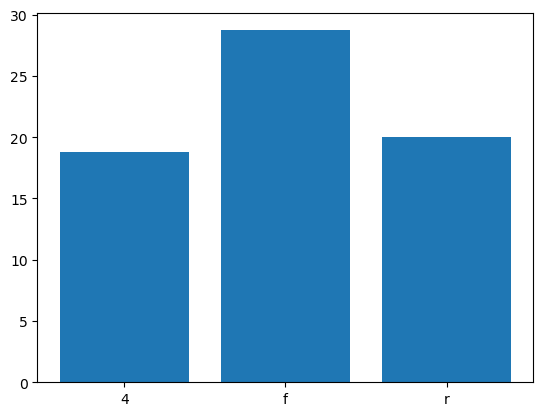

In [137]:
plt.bar(np.arange(len(pivot_drv_hwy_frm)), pivot_drv_hwy_frm['hwy'])
plt.xticks(np.arange(len(pivot_drv_hwy_frm)), list(pivot_drv_hwy_frm.index))

In [138]:
# 자동차(class)중에서 어떤 자동차가 가장 많은지 알아보려고 한다.

In [139]:
# car_frm.groupby('class').count().columns[0] : 'count'
car_frm.groupby('class').count().rename(columns = {car_frm.groupby('class').count().columns[0] : 'count'})[['count']]

,count
class,
2seater,3
compact,40
midsize,27
minivan,11
pickup,33
subcompact,27
suv,61


In [142]:
# cty 컬럼을 기준으로 역순정렬
sort_cty_frm = car_frm.sort_values('cty' , ascending = False)
sort_cty_frm
car_frm.sort_values('cty' , ascending = False)
sort_cty_frm.reset_index(drop=True , inplace=True)
sort_cty_frm

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44.0,d,subcompact
1,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44.0,d,compact
2,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41.0,d,subcompact
3,toyota,corolla,1.8,2008,4,manual(m5),f,28,37.0,r,compact
4,honda,civic,1.6,1999,4,manual(m5),f,28,33.0,r,subcompact
...,...,...,...,...,...,...,...,...,...,...,...
197,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12.0,e,pickup
198,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12.0,e,pickup
199,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12.0,e,suv
200,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12.0,e,suv


In [141]:
# 정렬결과에 대한 상위 5건 추출

In [143]:
sort_cty_frm.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44.0,d,subcompact
1,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44.0,d,compact
2,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41.0,d,subcompact
3,toyota,corolla,1.8,2008,4,manual(m5),f,28,37.0,r,compact
4,honda,civic,1.6,1999,4,manual(m5),f,28,33.0,r,subcompact


In [144]:
# car_mpg 데이터에서 구동방식별 고속도로 연비 평균과 도시연비 평균을 극단치를 제외하고 확인

In [146]:
car_frm.groupby('drv').agg(np.mean)[['cty' , 'hwy']]

,cty,hwy
drv,,
4,14.020619,18.752577
f,20.523810,28.726190
r,13.571429,20.047619
